In [14]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [3]:
titan = pd.read_csv(r"D:\黑马课程\人工智能V3.0（尊享无忧）\00 课程资料\4.阶段四机器学习\数据集\data\泰坦尼克号数据集.csv")
titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
x = titan[["Pclass", "Age", "Sex"]]
y = titan["Survived"]

In [6]:
# 缺失值需要处理，将特征当中有类别的这些特征进行字典特征抽取
x['Age'].fillna(x['Age'].mean(), inplace=True)

C:\Users\17634\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   Sex     891 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 21.0+ KB


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22)

In [9]:
# 对于x转换成字典数据x.to_dict(orient="records")
# [{"pclass": "1st", "age": 29.00, "sex": "female"}, {}]

transfer = DictVectorizer(sparse=False)

x_train = transfer.fit_transform(x_train.to_dict(orient="records"))
x_test = transfer.fit_transform(x_test.to_dict(orient="records"))

In [10]:
x_train

array([[28. ,  2. ,  1. ,  0. ],
       [45.5,  1. ,  0. ,  1. ],
       [38. ,  1. ,  0. ,  1. ],
       ...,
       [35. ,  2. ,  0. ,  1. ],
       [47. ,  3. ,  1. ,  0. ],
       [39. ,  3. ,  1. ,  0. ]])

In [12]:
# 4.机器学习(决策树)
# estimator = DecisionTreeClassifier(criterion="entropy", max_depth=5)
estimator = DecisionTreeClassifier(max_depth=5)
estimator.fit(x_train, y_train)

# 5.模型评估
estimator.score(x_test, y_test)

0.7668161434977578

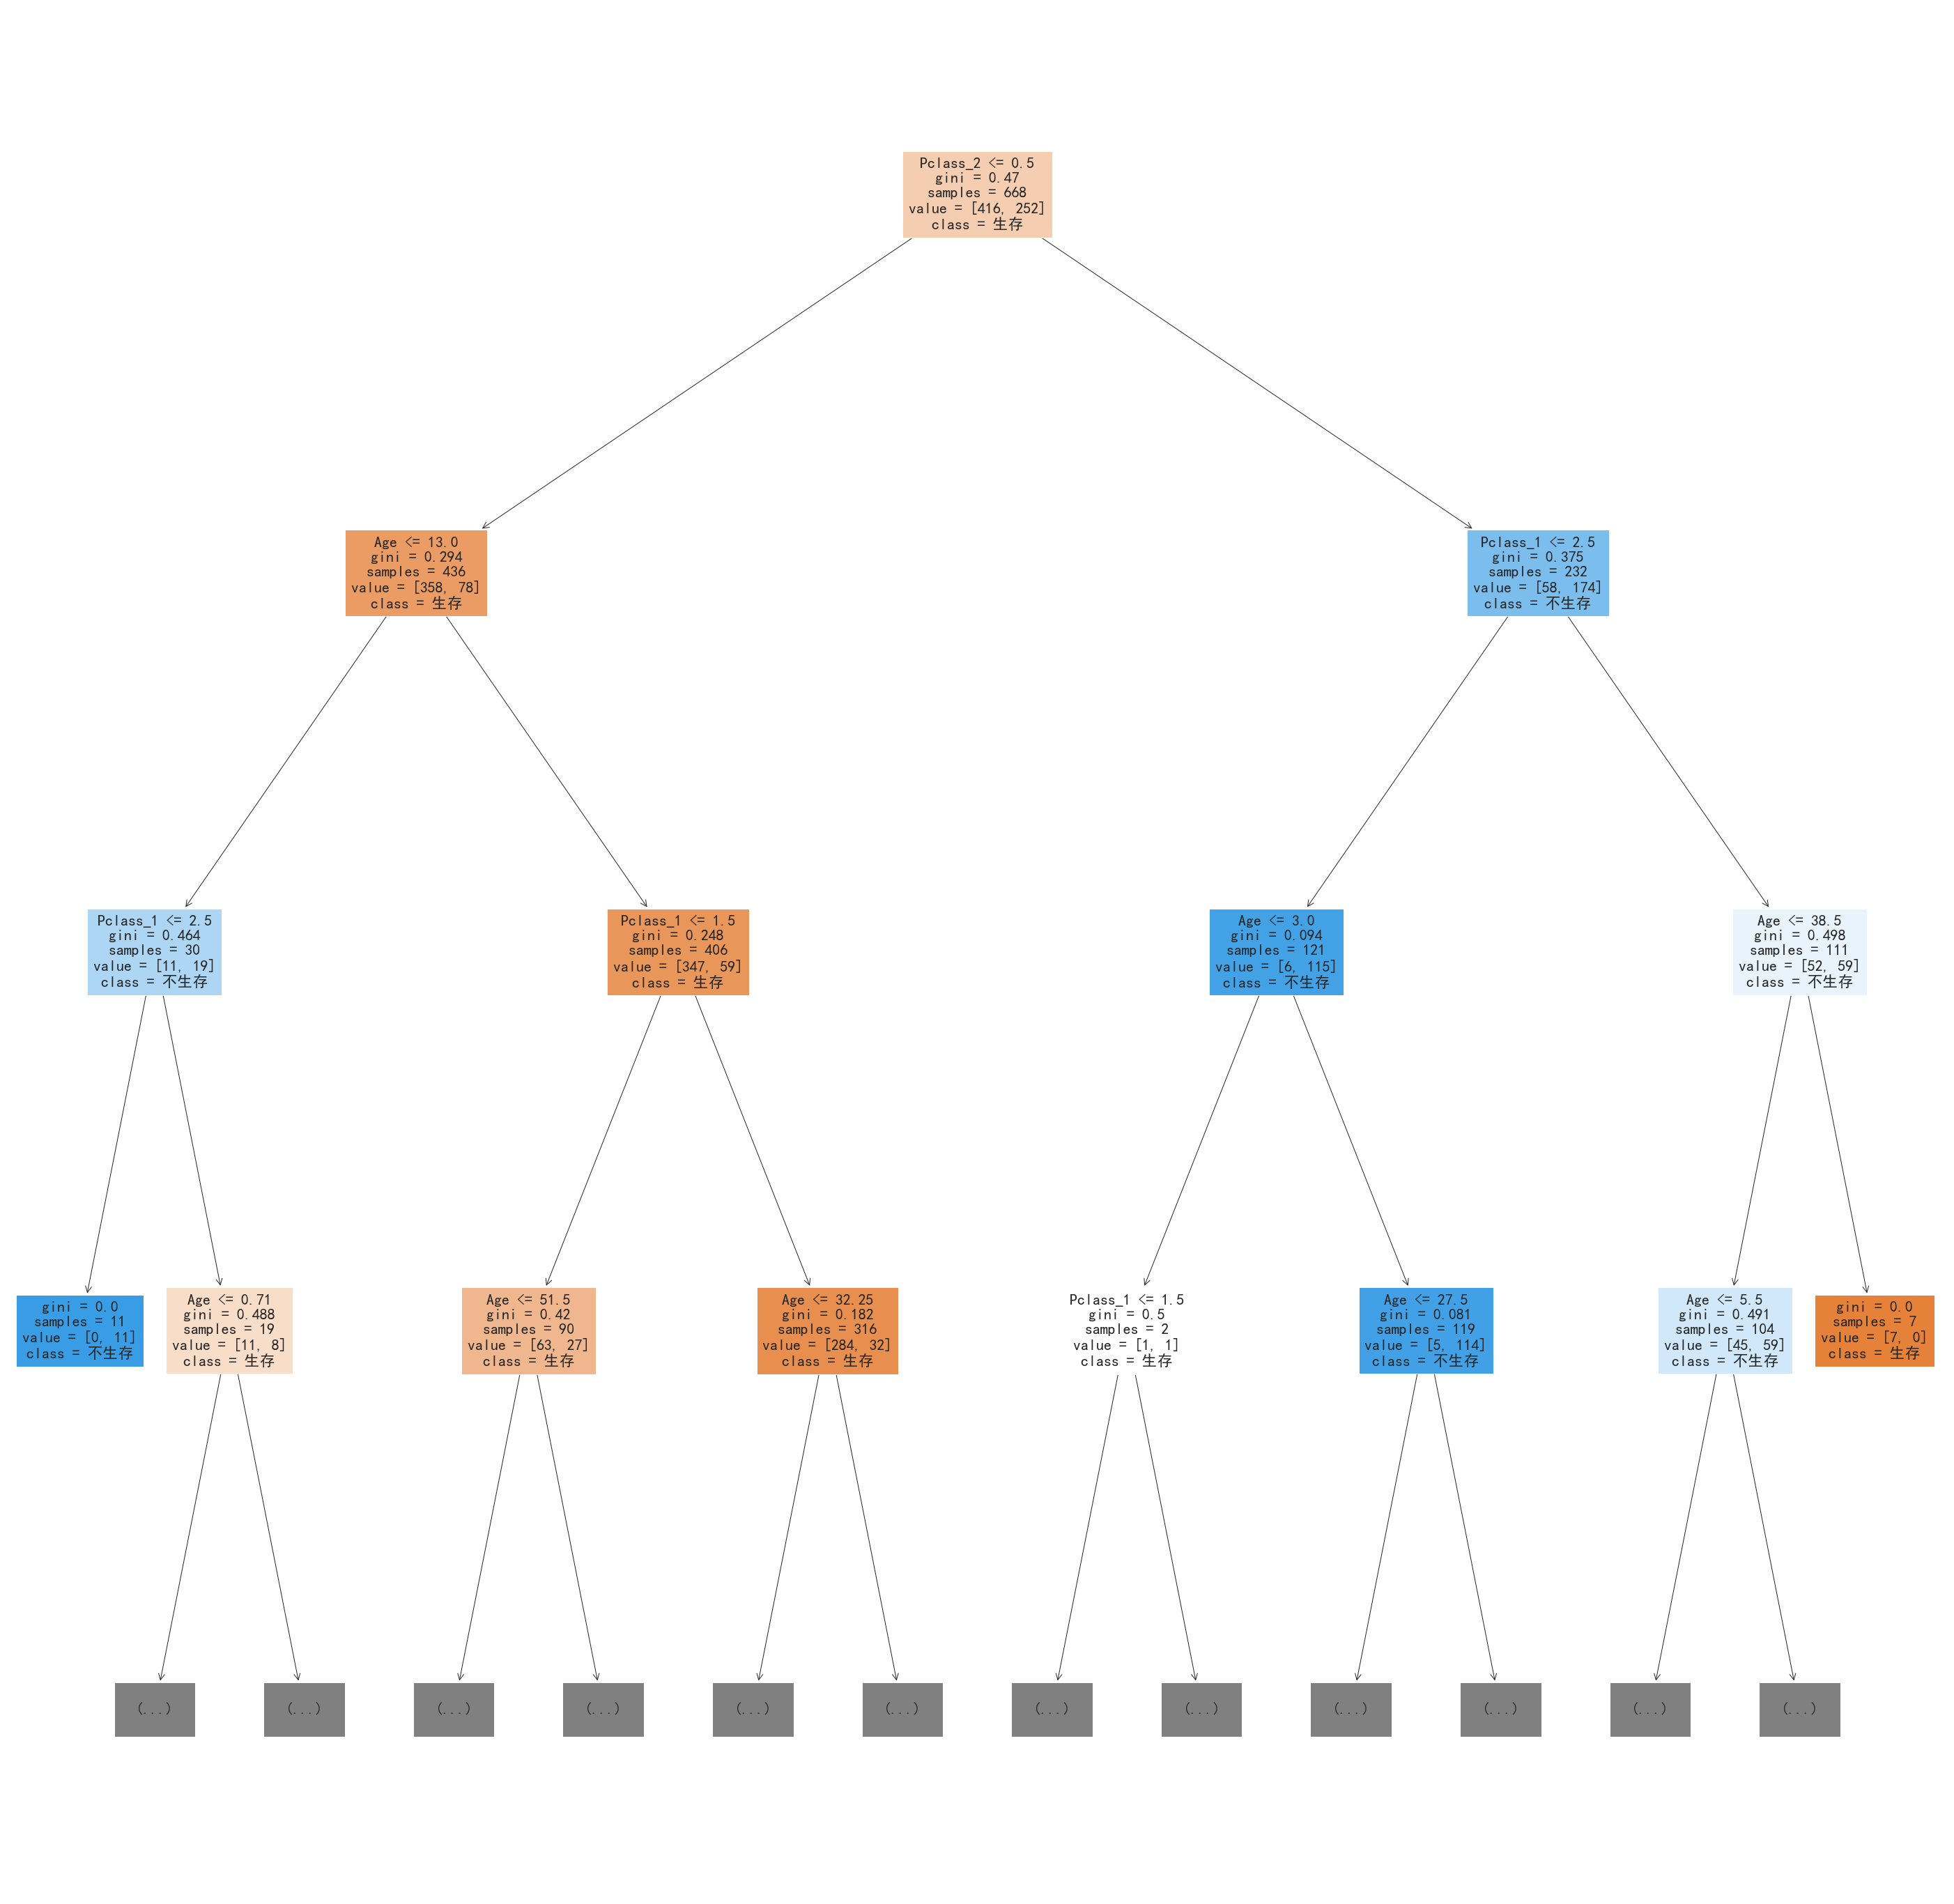

In [18]:
#保存决策树
plt.rcParams['font.sans-serif'] = ['SimHei']
fig, ax = plt.subplots(figsize=(50, 50))
plot_tree(estimator,
          ax=ax,
          max_depth=3,
          filled=True,
          feature_names=['Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male'],
          class_names=['生存', '不生存'])
plt.savefig('a.png', dpi=100)

<Figure size 432x288 with 0 Axes>